In [1]:
import pandas as pd
import numpy as np
import streamlit as st

In [2]:
from fuzzywuzzy import process

/home/sungbae/.local/share/virtualenvs/boardgame_recommendation_system-f-GT0dhu/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import requests

In [65]:
top100_id_list = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id=30549')

In [66]:
type(top100_id_list.json())

dict

In [4]:
from pyarrow import csv

In [130]:
detailed_data = csv.read_csv('./data/games_detailed_info.csv').to_pandas()
basic_data_new = csv.read_csv('./data/2022-01-08.csv').to_pandas()

In [200]:
def rank_to_int(x):
    if x.isdigit():
        return int(x)
    else:
        return 1000000

In [217]:
print(detailed_data['image'][detailed_data['Board Game Rank'].apply(rank_to_int)<=5])

7      https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...
26     https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...
28     https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...
98     https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...
199    https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...
Name: image, dtype: object


In [4]:
reivew_data = csv.read_csv('./data/bgg-19m-reviews.csv').to_pandas()

In [95]:
result_dict = requests.get('http://127.0.0.1:5000/name_id_dict?mode=name-id').json()

In [101]:
pd.DataFrame({'id':list(result_dict.keys()), 'name':list(result_dict.values())})

,id,name
0,"""La Garde recule!""",[122711]
1,"""Oh My God! There's An Axe In My Head."" The Ga...",[23304]
2,"""Scratch One Flat Top!""",[4016]
3,"""Tarleton's Quarter!""",[38836]
4,#MyLife,[286535]
...,...,...
21427,曼荼羅 (Mandara),[189218]
21428,猿道 (Monkey Road),[177572]
21429,白と黒でトリテ (Trick-Taking in Black and White),[335467]
21430,目撃者たちの夜 (Witness Night),[308238]


In [223]:
img_url = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id='+str(30549)+'&content=image').text

In [107]:
from PIL import Image
from io import BytesIO

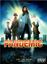

In [108]:
Image.open(BytesIO(response.content))

In [112]:
name_id_dict = requests.get('http://127.0.0.1:5000/name_id_dict?mode=name-id').json()

In [113]:
name_list = list(name_id_dict.keys())

In [193]:
id_list = requests.get('http://127.0.0.1:5000/game_list?mode=all').json()
result_dict = dict()
for id in id_list:
    review_data = requests.get('http://127.0.0.1:5000/api?data-source=review-data-new&game-id='+str(id)+'&content=comment').json()
    result_dict[id] = review_data


In [197]:
len(result_dict)

21631

In [174]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
input_df = pd.DataFrame()
id_list = requests.get('http://127.0.0.1:5000/game_list?mode=all')
id_list = id_list.json()
for id in id_list:
    detailed_game_data = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id='+str(id)).json()
    input_df = input_df.append(detailed_game_data, ignore_index=True)
input_df = input_df[['primary','minplayers','maxplayers','playingtime','minage','boardgamecategory',
                     'boardgamemechanic','boardgamefamily','bayesaverage','Board Game Rank','averageweight']]


In [177]:
input_df

,primary,minplayers,maxplayers,playingtime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,bayesaverage,Board Game Rank,averageweight
0,Pandemic,2,4,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",7.48669,106,2.4063
1,Carcassonne,2,5,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...",7.30857,191,1.9057
2,Catan,3,4,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...",6.96965,429,2.3130
3,7 Wonders,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",7.63355,73,2.3264
4,Dominion,2,4,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...",7.49912,104,2.3542
...,...,...,...,...,...,...,...,...,...,...,...
21626,Sacred Rites,3,9,30,8,"['Bluffing', 'Deduction', 'Humor', 'Party Game...","['Acting', 'Roles with Asymmetric Information'...",,5.53114,12750,2.0000
21627,BABEL,1,5,30,10,"['Action / Dexterity', 'Bluffing', 'Card Game'...","['Cooperative Game', 'Hand Management']","['Ancient: Babylon', 'Ancient: Mesopotamia']",5.51748,15017,0.0000
21628,Goldrush,2,4,60,10,"['American West', 'Dice', 'Exploration', 'Figh...","['Dice Rolling', 'Memory', 'Pick-up and Delive...",['States: Arizona'],5.48821,19461,1.3333
21629,Bongo Kongo,2,4,10,5,"['Action / Dexterity', 'Animals', ""Children's ...",,"['Animals: Apes / Monkeys', 'Components: Marbl...",5.50484,17262,1.2857


In [181]:
# input_df = pd.DataFrame()
id_list = requests.get('http://127.0.0.1:5000/game_list?mode=all')
id_list = id_list.json()
row_list = []
for id in id_list:
    detailed_game_data = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id='+str(id)).json()
    row_list.append(detailed_game_data)
input_df = pd.DataFrame(row_list)
input_df = input_df[['primary','minplayers','maxplayers','playingtime','minage','boardgamecategory',
                     'boardgamemechanic','boardgamefamily','bayesaverage','Board Game Rank','averageweight']]


In [183]:
input_df

,primary,minplayers,maxplayers,playingtime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,bayesaverage,Board Game Rank,averageweight
0,Pandemic,2,4,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",7.48669,106,2.4063
1,Carcassonne,2,5,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...",7.30857,191,1.9057
2,Catan,3,4,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...",6.96965,429,2.3130
3,7 Wonders,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",7.63355,73,2.3264
4,Dominion,2,4,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...",7.49912,104,2.3542
...,...,...,...,...,...,...,...,...,...,...,...
21626,Sacred Rites,3,9,30,8,"['Bluffing', 'Deduction', 'Humor', 'Party Game...","['Acting', 'Roles with Asymmetric Information'...",,5.53114,12750,2.0000
21627,BABEL,1,5,30,10,"['Action / Dexterity', 'Bluffing', 'Card Game'...","['Cooperative Game', 'Hand Management']","['Ancient: Babylon', 'Ancient: Mesopotamia']",5.51748,15017,0.0000
21628,Goldrush,2,4,60,10,"['American West', 'Dice', 'Exploration', 'Figh...","['Dice Rolling', 'Memory', 'Pick-up and Delive...",['States: Arizona'],5.48821,19461,1.3333
21629,Bongo Kongo,2,4,10,5,"['Action / Dexterity', 'Animals', ""Children's ...",,"['Animals: Apes / Monkeys', 'Components: Marbl...",5.50484,17262,1.2857


In [19]:
review_data_new = csv.read_csv('./data/bgg-19m-reviews.csv').to_pandas()

In [18]:
review_data_new

NameError: name 'review_data_new' is not defined

In [10]:
from langdetect import detect

In [229]:
languages = []
for comment in review_data_new["comment"]:
    try:
        languages.append(detect(comment))
    except:
        languages.append(None)

review_data_new["lang"] = languages

In [6]:
review_data_new

NameError: name 'review_data_new' is not defined

In [15]:
def get_lang(comment):
    try:
        return detect(comment)
    except:
        return None
    # if comment == None:
    #     return None
    # else:
    #     return detect(comment)
    # for comment in review_data_new["comment"]:
    #     try:
    #         languages.append(detect(comment))
    #     except:
    #         languages.append(None)


In [7]:
review_data_new = csv.read_csv('./data/bgg-19m-reviews.csv').to_pandas()


In [16]:
review_data_new['lang'] = review_data_new['comment'].apply(get_lang)

In [20]:
detailed_data = csv.read_csv('./data/games_detailed_info.csv').to_pandas()

In [21]:
detailed_json = detailed_data.to_json()

In [ ]:
detailed_json

In [6]:
tsne_data0 = csv.read_csv('./data/tsne_game_info2.csv').to_pandas()

In [8]:
len(tsne_data0)

21631

In [9]:
tsne_data0.columns

Index(['', 'primary', 'minplayers', 'maxplayers', 'playingtime', 'minage',
       'boardgamecategory', 'boardgamemechanic', 'boardgamefamily',
       'bayesaverage', 'Board Game Rank', 'averageweight', 'drop',
       'category_tsne_0', 'category_tsne_1', 'mechanic_tsne_0',
       'mechanic_tsne_1'],
      dtype='object')

In [10]:
detailed_data['category_tsne_0'] = tsne_data0['category_tsne_0']
detailed_data['category_tsne_1'] = tsne_data0['category_tsne_1']
detailed_data['mechanic_tsne_0'] = tsne_data0['mechanic_tsne_0']
detailed_data['mechanic_tsne_1'] = tsne_data0['mechanic_tsne_1']

In [14]:
detailed_data['drop'] = tsne_data0['drop']

In [15]:
detailed_data

,,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,...,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank,category_tsne_0,category_tsne_1,mechanic_tsne_0,mechanic_tsne_1,drop
0,0,boardgame,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,Pandemic,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,...,NaN,NaN,NaN,NaN,NaN,25.207352,-15.050651,-4.747487,-16.240620,False
1,1,boardgame,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile-placement game in which ...,2000,2,...,NaN,NaN,NaN,NaN,NaN,41.706080,-36.913746,-30.484463,27.454052,False
2,2,boardgame,13,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,Catan,"['CATAN', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,...,NaN,NaN,NaN,NaN,NaN,72.234924,-14.839277,21.459759,-47.390697,False
3,3,boardgame,68448,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,7 Wonders,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",You are the leader of one of the 7 great citie...,2010,2,...,NaN,NaN,NaN,NaN,NaN,6.841838,30.806892,-48.548756,-31.945122,False
4,4,boardgame,36218,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,Dominion,"['Dominion: Basisspiel', 'Dominion: In naam va...","&quot;You are a monarch, like your parents bef...",2008,2,...,NaN,NaN,NaN,NaN,NaN,3.685047,22.607609,-28.113113,-22.217678,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,21626,boardgame,296892,https://cf.geekdo-images.com/d37HVSmlYM2ZQpaKD...,https://cf.geekdo-images.com/d37HVSmlYM2ZQpaKD...,Sacred Rites,,It has come time to honor the traditions of th...,2020,3,...,NaN,NaN,NaN,NaN,NaN,-33.667767,-13.881828,31.091545,51.573380,False
21627,21627,boardgame,217378,https://cf.geekdo-images.com/BDS9Ndm2gb8QyE-i1...,https://cf.geekdo-images.com/BDS9Ndm2gb8QyE-i1...,BABEL,,BABEL is a balancing game in which players mak...,2016,1,...,NaN,NaN,NaN,NaN,NaN,84.929740,-19.065977,-3.019248,-4.820487,False
21628,21628,boardgame,18063,https://cf.geekdo-images.com/NRIjTeX6AbdhOp-w1...,https://cf.geekdo-images.com/NRIjTeX6AbdhOp-w1...,Goldrush,"['Arizona', 'Guldfeber', 'Kultakuume']",From the rules:&#10;&#10;Players are prospecto...,1970,2,...,NaN,NaN,NaN,NaN,NaN,8.580880,-33.126660,-17.638153,-59.566936,False
21629,21629,boardgame,10052,https://cf.geekdo-images.com/EGOJ027F8r3Nln1r0...,https://cf.geekdo-images.com/EGOJ027F8r3Nln1r0...,Bongo Kongo,,Each player takes a position adjacent to one o...,1989,2,...,NaN,NaN,NaN,NaN,NaN,-72.468864,4.012195,51.453274,19.541860,False


In [16]:
detailed_data.to_csv('new_detailed_data.csv', index=False)

In [17]:
detailed_data.dtypes

                     int64
type                object
id                   int64
thumbnail           object
image               object
                    ...   
category_tsne_0    float64
category_tsne_1    float64
mechanic_tsne_0    float64
mechanic_tsne_1    float64
drop                  bool
Length: 61, dtype: object